# Inspect the outliers from the linear regression modeling of Hubway data

In [1]:
import pandas as pd
from sklearn import linear_model
from sklearn import cross_validation
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import numpy as np
from pylab import savefig

In [2]:
ridedata = pd.read_csv('../Data/Boston/FeaturesGroup4.csv')

In [15]:
ridedata

,Unnamed: 0,stationid,duration,nrides,ndays,lat,lng,originpop,originwork,originsubway,destpop,destwork,destsubway,ridesperday
0,0,3,660.00,7653,442,42.340021,-71.100812,46319.464721,74916.454833,5983.553086,170072.531097,329836.589738,60598.207749,17.314480
1,1,4,538.00,12573,419,42.345392,-71.069616,41625.022896,94884.253642,13801.134297,293380.669614,579502.368031,100287.611125,30.007160
2,2,5,541.00,7718,419,42.341814,-71.090179,51632.732279,96836.189707,12123.716374,218292.833721,443672.203036,78405.994583,18.420048
3,3,6,600.00,17133,435,42.361285,-71.065140,29920.561942,137658.563572,30573.424838,327623.968409,658717.013677,137806.371045,39.386207
4,4,7,600.00,7028,403,42.353412,-71.044624,8737.062916,83724.598344,4747.836723,235849.204248,427375.597091,85539.806149,17.439206
5,5,8,912.00,5274,439,42.353334,-71.137313,30269.581512,12293.165262,2921.597170,106677.219212,85137.267830,16274.261803,12.013667
6,6,9,720.00,12393,422,42.351313,-71.116174,34518.021940,28229.977516,4674.694497,148091.225844,217093.416150,50200.926265,29.367299
7,7,10,600.50,12190,420,42.350075,-71.105884,42077.594773,68713.383669,8216.410782,180486.454351,316114.892197,69073.362761,29.023810
8,8,11,675.00,10544,444,42.338629,-71.106500,33744.834722,45284.174958,5648.411253,144513.954926,263720.567260,49250.453228,23.747748
9,9,12,559.00,8300,445,42.335911,-71.088496,43345.121307,53865.362839,14380.360366,186019.052366,403288.644578,68052.817222,18.651685


In [3]:
outlierrides = ridedata['ridesperday'] > 62

In [4]:
outlier = ridedata[outlierrides]

In [16]:
outlier

,Unnamed: 0,stationid,duration,nrides,ndays,lat,lng,originpop,originwork,originsubway,destpop,destwork,destsubway,ridesperday
19,19,22,509,49288,446,42.352175,-71.055547,21251.106657,136913.042240,45583.402045,307461.577495,587165.743876,112107.505066,110.511211
32,32,36,660,29532,423,42.349673,-71.077303,39860.798337,107359.752732,33195.743092,304777.382389,607433.744791,110563.746694,69.815603
34,34,38,643,17692,231,42.366231,-71.060868,24155.969869,101929.387555,11770.754189,288823.470053,581683.897608,131391.709891,76.588745
63,63,67,480,23370,258,42.358100,-71.093198,27644.381102,52928.965177,3771.465735,234203.590600,456896.865855,101114.336104,90.581395
109,109,113,660,15506,211,42.360690,-71.070884,29036.005170,111571.788509,17414.709057,324086.598619,651728.956605,134399.004037,73.488152
110,110,114,600,15239,182,42.365942,-71.060515,24234.081206,105658.504291,13249.366415,290526.900177,584993.621392,131727.948668,83.730769
124,124,128,570,14095,201,42.362457,-71.084970,21473.942777,48901.007209,15126.912154,259877.424024,515094.858255,112922.421226,70.124378


In [14]:
for i in range(len(outlier)):
    print(outlier['lat'].values[i], outlier['lng'].values[i])

(42.352175000000003, -71.055547000000004)
(42.349672999999996, -71.077303000000001)
(42.366230999999999, -71.060867999999999)
(42.3581, -71.093198000000001)
(42.360690000000005, -71.070883999999992)
(42.365941999999997, -71.060515000000009)
(42.362456999999999, -71.084969999999998)


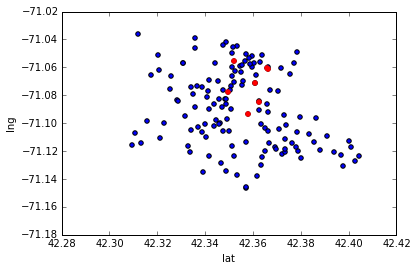

In [9]:
ax = ridedata.plot(x='lat', y='lng', kind='scatter')
outlier.plot(x='lat', y='lng', kind='scatter', ax=ax, color='red')

In [145]:
y = ridedata['ridesperday'].values
X = ridedata[['originpop', 'originwork','destpop','destwork','originsubway','destsubway']].values

In [146]:
clf = linear_model.LinearRegression()
#clf.fit(X_train, y_train)
#clf.coef_
#clf.score(X_test, y_test)
scores = cross_validation.cross_val_score(clf, X, y, cv=5, scoring='median_absolute_error')

In [147]:
scores, scores.mean(), scores.std()

(array([-5.15259405, -7.75544599, -9.45910855, -8.68410996, -5.51618866]),
 -7.3134894431300381,
 1.7074757103184486)

In [148]:
X.shape

(142, 6)

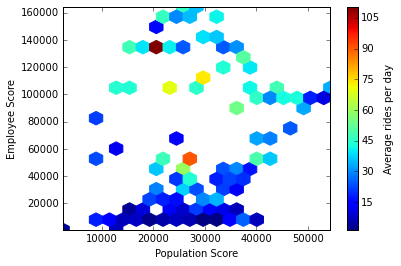

In [149]:
plt.hexbin(X[:,0], X[:, 1], C=y, gridsize=20)
cbar = plt.colorbar()
plt.xlabel('Population Score')
plt.ylabel('Employee Score')
cbar.set_label('Average rides per day')
savefig('../Figures/workpoprides_Group4.png')

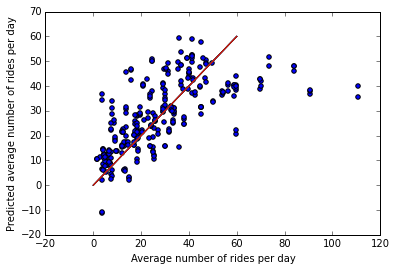

In [150]:
for isim in range(10):
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(
         X, y, test_size=0.2)
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    plt.scatter(y_test, y_pred)
    plt.plot([0,60], [0,60])
    plt.xlabel('Average number of rides per day')
    plt.ylabel('Predicted average number of rides per day')
savefig('../Figures/ridesperdayregression_Group4.png')

In [97]:
ridedata.plot(x='start_day', y='nrides', figsize=(12,6))

KeyError: 'start_day'